# Logistic Regression - Data Preparation

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [56]:
plt.style.use('seaborn')

# Data Preparation

In [57]:
mean_01=np.array([1,0.5])
covariance_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
covariance_02=np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist_01=np.random.multivariate_normal(mean_01,covariance_01,500)
dist_02=np.random.multivariate_normal(mean_02,covariance_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


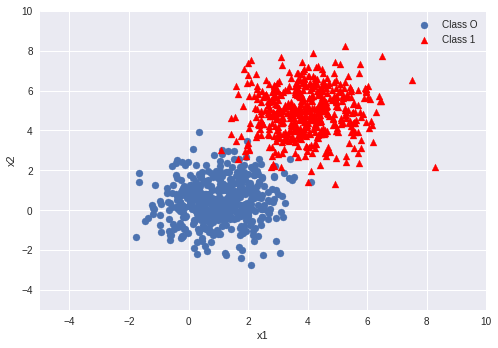

In [58]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class O')
plt.scatter(dist_02[:,0],dist_02[:,1],label='Class 1',marker='^',color='red')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Create Training and Test Set

In [59]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [60]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [61]:
np.random.shuffle(data)
print(data[:10])

[[ 2.88211567  5.72298504  1.        ]
 [ 0.81686058 -1.24264345  0.        ]
 [ 2.69569862 -0.1302653   0.        ]
 [ 1.50832185  0.03230665  0.        ]
 [ 2.44622421  2.33418027  0.        ]
 [ 0.81684393  0.26765064  0.        ]
 [ 1.19450229 -0.53041564  0.        ]
 [-0.35122325 -0.83800315  0.        ]
 [ 3.12455452  2.14229162  1.        ]
 [ 1.32756005  0.66963925  0.        ]]


In [62]:
split = int(0.8*data.shape[0])

In [63]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression - Implementation

In [64]:
def hypothesis(x,w,b):
    '''Accepts input vector x, input weight vector w, and bias b'''
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
    grad_w/=m
    grad_b/=m
    return [grad_w,grad_b]  

# One iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    w+=learning_rate*grad_w
    b+=learning_rate*grad_b
    return err,w,b

In [65]:
loss=[]
acc=[]
W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()

In [66]:
for i in range(100):
    l,W,b=grad_descent(X_train,Y_train,W,b,learning_rate=0.5)
    loss.append(l)

In [67]:
print(l)

0.16494170240480296


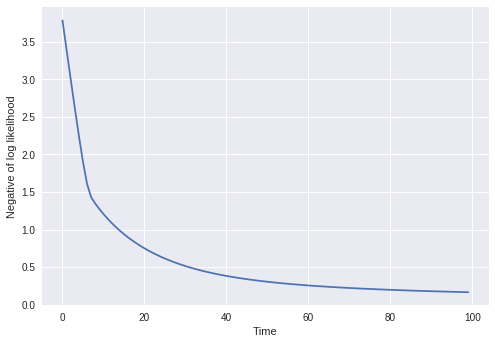

In [69]:
plt.plot(loss)
plt.xlabel('Time')
plt.ylabel('Negative of log likelihood')
plt.show()

In [70]:
def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [71]:
loss=[]
acc=[]
W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()
for i in range(100):
    l,W,b=grad_descent(X_train,Y_train,W,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

In [80]:
loss=[]
acc=[]
W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()
for i in range(1000):
    l,W,b=grad_descent(X_train,Y_train,W,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

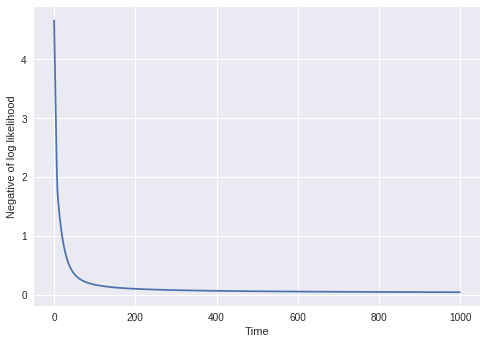

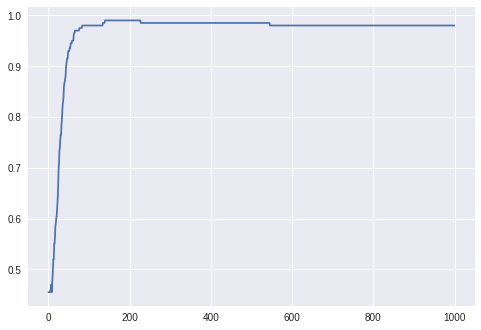

In [81]:
plt.plot(loss)
plt.xlabel('Time')
plt.ylabel('Negative of log likelihood')
plt.show()
plt.plot(acc)
plt.show()

In [82]:
print(acc[-1])

0.98


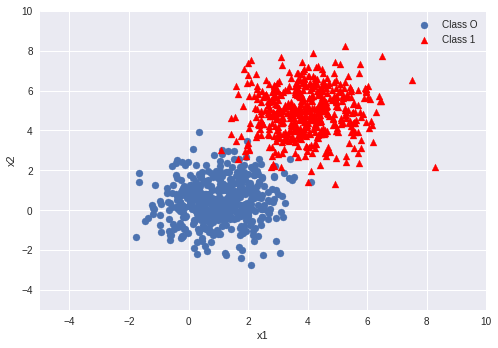

In [83]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class O')
plt.scatter(dist_02[:,0],dist_02[:,1],label='Class 1',marker='^',color='red')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [84]:
print(W)
print(b)

[1.34725281 1.87402162]
-8.005468890871363


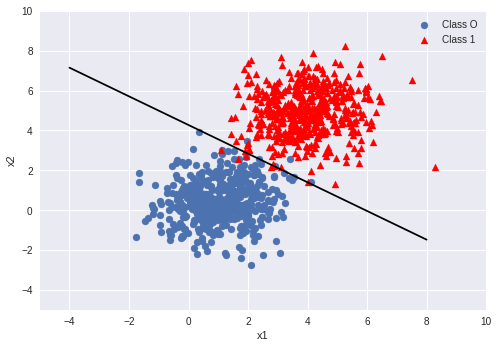

In [85]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class O')
plt.scatter(dist_02[:,0],dist_02[:,1],label='Class 1',marker='^',color='red')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
x=np.linspace(-4,8,10)
y=-(W[0]*x+b)/W[1]
plt.plot(x,y,color='black')
plt.show()